# CS 688 Homework 1 - Maryam Asghari

## Scrape Bing.com & Get 50 Covid-19 Related News

### (1) Use a BeautifulSoap,search for the Covid-19 and download 50 articles title or abstract, from the search result, via web scrapping.

Instal Splinter 
Splinter is an open source tool for testing web applications using Python. It lets you automate browser actions, such as visiting URLs and interacting with their items.

In [1]:
# ! pip install splinter

Setting up Chrome WebDriver on macOS

In [2]:
# ! brew cask install chromedriver

Beautiful Soup has to be installed before Python can use it.
To do this : run pip install bs4 within the terminal.

In [3]:
# Dependencies

import requests  
#The requests module allows us to send HTTP requests using Python

from bs4 import BeautifulSoup  
#This line is used to import the Beautiful Soup library into the application.

# import Pandas Library
import pandas as pd  

# import RE Library
import re 
#Regular expression operations Library the functions in this module let us check 
#if a particular string matches a given regular expression

# import matplotlib Library
import matplotlib.pyplot as plt 

#Using Splinter to automate browser actions
from splinter import Browser  

In [4]:
#choosing chrom driver 
!which chromedriver

/usr/local/bin/chromedriver


Useing Chrome from a custom path: 
pass the executable path as a dictionary to the **kwargs argument. 
Set up the dictionry with executable_path as the key and the value set to the path to the executable file.

In [5]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

Specify the link of the web page we want to scrape
We need to search for COVID-19

In [7]:
query = 'COVID-19'.lower()  
url = f'https://www.bing.com/news/search?q={query}&form=QBNH'

In [8]:
# visiting the Url in the our browser 
browser.visit(url)

Note :we need to give it some time, scroll down to the bottom of the page to read all 50 news

In [9]:
html = browser.html

In [10]:
#Creat a Beautiful Soup object and the object returned is assigned to the soup variable.
soup = BeautifulSoup(html, 'html.parser')   


In [11]:
#The type(soup) method being used confirms that 
#the soup object created is indeed a BeautifulSoup object.

type(soup)

bs4.BeautifulSoup

In [12]:
#Print formatted version of the soup that is easier to read.
#print(soup. prettify())


Check the formatted version of the soup  or use the website's html to find the id and class

In [13]:
news = soup.find_all('div', class_='t_s', limit = 50)
print(f'Number of scraped news: {len(news)}') #check out if we have 50 


Number of scraped news: 50


Only get the title and abstract using the id and class

In [14]:
titles = [n.find('a',class_ = 'title').text for  n  in news]   #.text :Extract the text of the tittle
abstracts = [n.find('div', class_='snippet').text for  n  in news]


### (2) Stores the downloaded articles’ title and abstract on your local drive in a standard file format, CSV


In [15]:
news_df = pd.DataFrame({'title': titles , 'abstract': abstracts })
news_df.to_csv('Top_50_COVID19_news.csv', index = False)
news_df.head()

,title,abstract
0,US to roll out 8.5M at-home tests a month; Fau...,Federal health officials announced Monday a $2...
1,U.S. Cuts $231 Million Deal To Provide 15-Minu...,The Food and Drug Administration gave emergenc...
2,U.S. military comes to the aid of hospitals hi...,Medical personnel sent by the Department of De...
3,New diabetes cases linked to covid-19,Researchers don’t understand exactly how the d...
4,Third stimulus check updates: Biden to meet to...,President Joe Biden is set to meet on Monday w...


### (3)Write a script to look at the title of each article and count the following words: “Influenza”, “Travel”, “School”, “vaccine” Then, create a word frequency histogram.

In [16]:
#function to count the words 
def word_count(text,string):
    words = text.split()
    count = 0
    for word in words:
        if word.lower() == string.lower():
            count += 1
        else:
            count += 0
    return count

In [17]:
#function to find the frequency of the words and plot the histogram 
def word_freq_inText(text_list, words):
    
    text_str = ' '.join(text_list)

    #remove punctuation from the text
    text_str = re.sub(r'[^\w\s]','',text_str) #use RE Library
    print(text_str)
    print('--'*20) 

    #Create a dictionary 
    words_freq = {} 
    for word in words:
        words_freq[word] = word_count(text_str, word)
        
        
    #Bar chart
    keys = words_freq.keys()
    values = words_freq.values()
    
    
    fig = plt.figure(figsize=(16,8))
    plt.bar(keys, values, color = 'darkblue')
    
    plt.ylabel('Count')
    plt.title('Words count')
    plt.show()

    return words_freq

#### 1. Title

US to roll out 85M athome tests a month Fauci urges Americans to get any vaccine when eligible Latest COVID19 updates US Cuts 231 Million Deal To Provide 15Minute COVID19 AtHome Tests US military comes to the aid of hospitals hit hard by COVID19 New diabetes cases linked to covid19 Third stimulus check updates Biden to meet today with Republican senators who want smaller COVID19 relief plan Covid19 Vaccines Leave Pregnant Women in a Quandary Oxford researchers didnt tell COVID19 vaccine trial volunteers of a dosing mistake when it was discovered a letter reveals US Invests 232 Million to Produce More AtHome Covid19 Tests Indiana opens COVID19 vaccine eligibility to those 6569 Shoppers face shortages of cars shirts and smart speakers amid COVID19 shipping delays As pandemic worsens Portugal reports nearly half of all its COVID19 deaths in January Nigerias Commercial Hub Begins Clinical Trial of AntiParasitic Ivermectin For Covid19 CDC says new US COVID19 cases are down but 3 variants ca

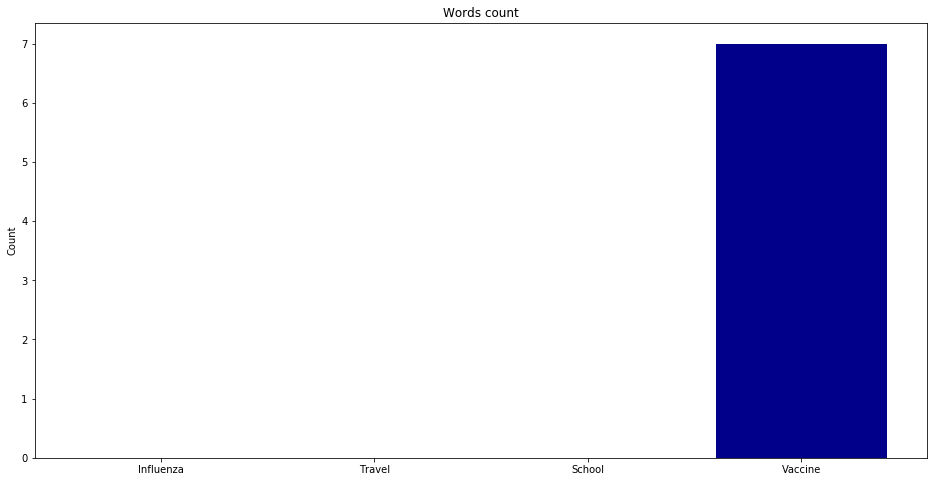

{'Influenza': 0, 'Travel': 0, 'School': 0, 'Vaccine': 7}

In [18]:
words = ["Influenza" , "Travel" , "School" ,"Vaccine" ]

word_freq_inText(text_list = titles, words= words)

#### 2. Abstract

Federal health officials announced Monday a 230 million deal to expand the use of a nonprescription athome COVID19 test The Food and Drug Administration gave emergency authorization to Ellumes rapid test in December after it showed 96  Medical personnel sent by the Department of Defense to one Los Angeles hospital are acting as reinforcements to hold the line  Researchers dont understand exactly how the disease might trigger diabetes or whether the cases are temporary or permanent President Joe Biden is set to meet on Monday with 10 Republican senators who have proposed 618 billion in coronavirus relief  Expectant mothers faced with little data and mixed guidance are struggling to decide whether they should get vaccinated Medical ethicists said Oxford researchers may not have been transparent with participants in the trial for AstraZenecas shot  The US government is investing 2318 million to ramp up production from an Australian manufacturer of athome Covid19  Indiana health officials 

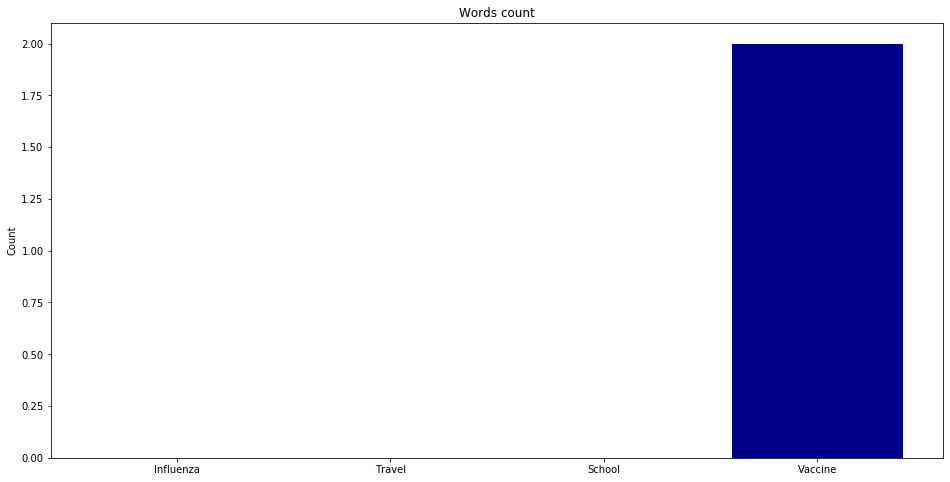

{'Influenza': 0, 'Travel': 0, 'School': 0, 'Vaccine': 2}

In [19]:
words = ["Influenza" , "Travel" , "School" ,"Vaccine" ]

word_freq_inText(text_list = abstracts, words= words)

US to roll out 85M athome tests a month Fauci urges Americans to get any vaccine when eligible Latest COVID19 updates US Cuts 231 Million Deal To Provide 15Minute COVID19 AtHome Tests US military comes to the aid of hospitals hit hard by COVID19 New diabetes cases linked to covid19 Third stimulus check updates Biden to meet today with Republican senators who want smaller COVID19 relief plan Covid19 Vaccines Leave Pregnant Women in a Quandary Oxford researchers didnt tell COVID19 vaccine trial volunteers of a dosing mistake when it was discovered a letter reveals US Invests 232 Million to Produce More AtHome Covid19 Tests Indiana opens COVID19 vaccine eligibility to those 6569 Shoppers face shortages of cars shirts and smart speakers amid COVID19 shipping delays As pandemic worsens Portugal reports nearly half of all its COVID19 deaths in January Nigerias Commercial Hub Begins Clinical Trial of AntiParasitic Ivermectin For Covid19 CDC says new US COVID19 cases are down but 3 variants ca

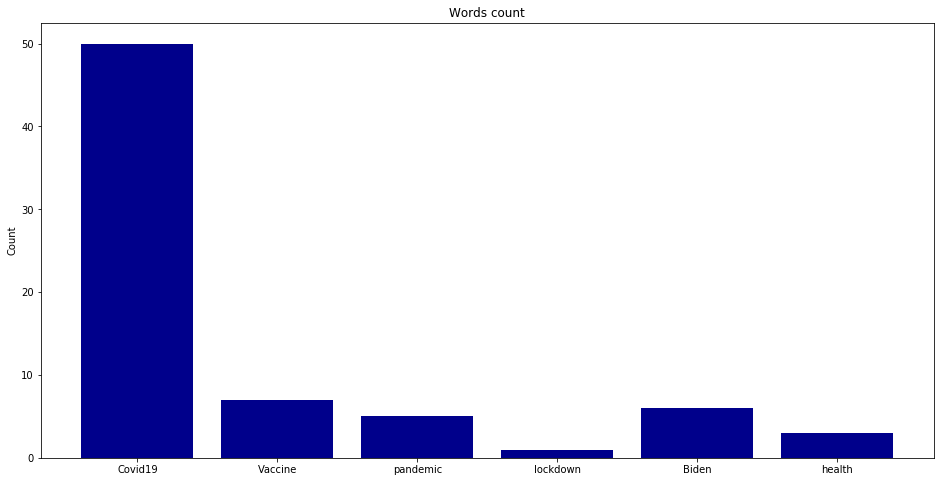

{'Covid19': 50,
 'Vaccine': 7,
 'pandemic': 5,
 'lockdown': 1,
 'Biden': 6,
 'health': 3}

In [20]:
words = ["Covid19","Vaccine","pandemic", "lockdown", "Biden" , "health"]

word_freq_inText(text_list = titles, words= words)